In [1]:
########################################################################################################
# IMPORT LIBRARIES
########################################################################################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
########################################################################################################
# Read dataset obtained from previous step where semantic scores are calculated
########################################################################################################
toyData=pd.read_csv("Toys_and_Games.csv");

In [3]:
toyData.head(4)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,PreProcessed_reviewText,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio
0,439893577,"[1, 1]",4,Love the magnet easel... great for moving to d...,"03 28, 2014",A8R62G708TSCM,love the magnet easel great for moving to diff...,0.650000,8.3,0.433333,4.459432,7.588870,0.750000
1,439893577,"[1, 1]",5,Both sides are magnetic. A real plus when you...,"01 28, 2013",A21KH420DK0ICA,both sides are magnetic a real plus when your...,0.450000,29.4,0.333333,5.497670,6.688048,0.200000
2,439893577,"[0, 0]",5,Bought one a few years ago for my daughter and...,"02 8, 2014",AR29QK6HPFYZ4,bought one a few years ago for my daughter and...,0.450000,10.7,0.250000,4.389365,7.461429,0.500000
3,439893577,"[1, 1]",4,I have a stainless steel refrigerator therefor...,"05 5, 2014",ACCH8EOML6FN5,i have a stainless steel refrigerator therefor...,0.383333,18.1,0.300000,4.926721,6.906960,0.666667


In [4]:
########################################################################################################
# Make groups of dataset based on distinct values  of column 'overall' and compute average values of
# each semantic score for each group
########################################################################################################
groupedData=toyData.groupby(['overall']).mean()
groupedData

,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio
overall,,,,,,
1,0.496235,43.495212,0.019646,5.631696,7.154661,0.618717
2,0.500991,49.697695,0.071962,5.773701,7.160521,0.643680
3,0.504213,48.623105,0.128070,5.727293,7.204525,0.638250
4,0.512541,47.424367,0.183872,5.698653,7.269105,0.642350
5,0.529315,33.991421,0.252520,5.350829,7.307210,0.621209


In [5]:
########################################################################################################
# Add column 'overall' to grouped data
########################################################################################################
groupedData['overall']=[1,2,3,4,5]

In [8]:
type(groupedData)

pandas.core.frame.DataFrame

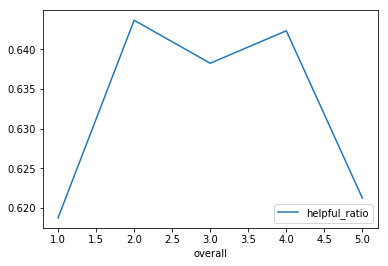

In [7]:
########################################################################################################
# Visualize line plot on grouped data for 'helpful ratio' column vs 'overall' column
########################################################################################################
lines=groupedData.plot.line(x='overall',y='helpful_ratio')

In [9]:
########################################################################################################
# Compute covariance between 'overall' and 'helpful ratio' columns
########################################################################################################
covariance = cov(toyData['overall'], toyData['helpful_ratio'])
print(covariance)

[[ 0.99266077 -0.00570765]
 [-0.00570765  0.02143034]]


In [12]:
########################################################################################################
# Compute pearson correlation between 'overall' and 'helpful_ratio' columns
########################################################################################################
corr, _ = pearsonr(toyData['overall'], toyData['helpful_ratio'])
print('Pearsons correlation between rating and helpful_ratio is: %.5f' % corr)

Pearsons correlation between rating and helpful_ratio is: -0.03913


In [13]:
########################################################################################################
# Compute spearnmans correlation between 'overall' and 'helpful_ratio' columns
########################################################################################################
corr, _ = spearmanr(toyData['overall'], toyData['helpful_ratio'])
print('Spearmans correlation between rating and helpful_ratio is: %.5f' % corr)

Spearmans correlation between rating and helpful_ratio is: -0.06610


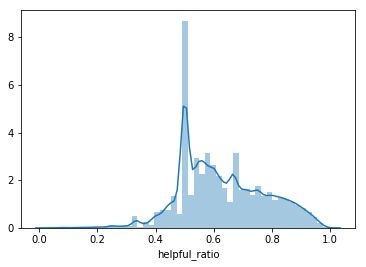

In [15]:
########################################################################################################
# Visualize distplot of 'helpful_ratio' column
########################################################################################################
sns.distplot(toyData.helpful_ratio)
plt.show()

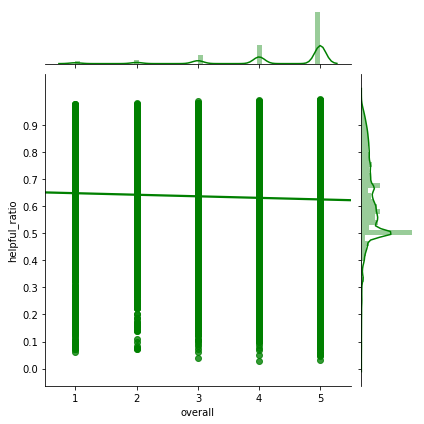

In [23]:
########################################################################################################
# Visualize jointplot of 'helpful_ratio' column again 'overall' column
########################################################################################################
sns.jointplot(data=toyData, x='overall', y='helpful_ratio', kind='reg', color='g')
#plt.ylim(-1,36)
plt.yticks(np.arange(0, 1, 0.1))
plt.show()